In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
delhi_meteo = pd.read_csv('/kaggle/input/delhi-aqi/Delhi/Metrological Data/Delhi.csv', delimiter=',')
delhi_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,6.0,100,0.0,990.3,4.9,9.0,306,337
1,2024-01-01T01:00,9.6,91,0.0,991.8,3.8,8.4,343,353
2,2024-01-01T02:00,9.8,90,0.0,992.2,3.6,8.8,354,351
3,2024-01-01T03:00,10.6,87,0.0,992.9,4.7,9.2,351,349
4,2024-01-01T04:00,11.7,80,0.0,993.5,5.8,6.9,353,354
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.0,100,0.0,992.2,2.9,9.0,292,329
8780,2024-12-31T20:00,7.5,100,0.0,991.6,3.2,8.6,286,323
8781,2024-12-31T21:00,7.4,100,0.0,991.2,4.5,11.5,275,310
8782,2024-12-31T22:00,7.7,99,0.0,990.9,6.0,14.4,295,300


In [3]:
delhi_pollutants = pd.read_csv('/kaggle/input/delhi-aqi/Delhi/Pollutants/City_wise_raw_data_1Hr_2024_Delhi_1Hr.csv', delimiter= ',')
delhi_pollutants['Timestamp'] = delhi_meteo['time']
delhi_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
delhi_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,171.80,271.46,15.74,35.04,40.31,41.44,11.57,1.32,12.89,...,1.68,11.02,76.22,0.53,168.11,0.0,0.0,9.49,974.89,0.20
1,2024-01-01T01:00,169.67,266.77,16.18,33.60,39.88,43.22,10.98,1.26,13.40,...,2.00,10.96,76.29,0.52,168.11,0.0,0.0,9.54,974.86,0.21
2,2024-01-01T02:00,164.49,257.12,16.55,35.11,41.15,41.41,11.58,1.28,13.17,...,3.87,10.89,76.27,0.54,177.42,0.0,0.0,9.66,974.89,0.20
3,2024-01-01T03:00,162.01,252.37,15.37,33.86,39.27,43.20,10.27,1.25,12.99,...,4.02,10.84,76.16,0.52,182.27,0.0,0.0,9.69,974.85,0.20
4,2024-01-01T04:00,159.34,252.60,15.66,33.36,39.21,41.54,10.26,1.26,12.85,...,2.22,10.78,76.14,0.66,167.64,0.0,0.0,9.64,974.72,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,198.61,321.53,27.89,62.81,57.15,45.63,14.83,1.66,14.38,...,0.98,12.84,85.45,0.56,165.44,0.0,0.0,10.49,977.48,-0.02
8780,2024-12-31T20:00,197.96,329.01,43.13,59.62,67.87,46.22,15.53,1.88,12.03,...,2.04,12.63,87.28,0.49,171.28,0.0,0.0,10.67,977.80,-0.03
8781,2024-12-31T21:00,208.68,351.64,51.96,56.93,73.58,47.91,15.62,2.05,11.81,...,2.28,12.43,88.25,0.62,175.76,0.0,0.0,10.79,977.83,-0.02
8782,2024-12-31T22:00,227.68,374.71,61.51,56.39,80.21,49.37,17.36,2.16,12.11,...,2.48,12.07,89.32,0.61,153.84,0.0,0.0,10.84,977.67,-0.03


In [4]:
delhi = pd.merge(delhi_meteo.iloc[:, :], delhi_pollutants.iloc[:, 0:3], on='time')
delhi

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,6.0,100,0.0,990.3,4.9,9.0,306,337,171.80,271.46
1,2024-01-01T01:00,9.6,91,0.0,991.8,3.8,8.4,343,353,169.67,266.77
2,2024-01-01T02:00,9.8,90,0.0,992.2,3.6,8.8,354,351,164.49,257.12
3,2024-01-01T03:00,10.6,87,0.0,992.9,4.7,9.2,351,349,162.01,252.37
4,2024-01-01T04:00,11.7,80,0.0,993.5,5.8,6.9,353,354,159.34,252.60
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.0,100,0.0,992.2,2.9,9.0,292,329,198.61,321.53
8780,2024-12-31T20:00,7.5,100,0.0,991.6,3.2,8.6,286,323,197.96,329.01
8781,2024-12-31T21:00,7.4,100,0.0,991.2,4.5,11.5,275,310,208.68,351.64
8782,2024-12-31T22:00,7.7,99,0.0,990.9,6.0,14.4,295,300,227.68,374.71


In [5]:
delhi['city'] = 'Delhi'

In [6]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    delhi[delay1_col] = delhi[col].shift(1)
    delay2_col = col + "_delay2"
    delhi[delay2_col] = delhi[col].shift(2)
    delhi.loc[0, delay1_col] = delhi[col].iloc[-1]
    delhi.loc[1, delay2_col] = delhi[col].iloc[-1]
    delhi.loc[0, delay2_col] = delhi[col].iloc[-2]

delhi

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.0,100,0.0,990.3,4.9,9.0,306,337,171.80,271.46,Delhi,246.06,227.68,391.50,374.71
1,2024-01-01T01:00,9.6,91,0.0,991.8,3.8,8.4,343,353,169.67,266.77,Delhi,171.80,246.06,271.46,391.50
2,2024-01-01T02:00,9.8,90,0.0,992.2,3.6,8.8,354,351,164.49,257.12,Delhi,169.67,171.80,266.77,271.46
3,2024-01-01T03:00,10.6,87,0.0,992.9,4.7,9.2,351,349,162.01,252.37,Delhi,164.49,169.67,257.12,266.77
4,2024-01-01T04:00,11.7,80,0.0,993.5,5.8,6.9,353,354,159.34,252.60,Delhi,162.01,164.49,252.37,257.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.0,100,0.0,992.2,2.9,9.0,292,329,198.61,321.53,Delhi,191.04,189.05,320.98,319.75
8780,2024-12-31T20:00,7.5,100,0.0,991.6,3.2,8.6,286,323,197.96,329.01,Delhi,198.61,191.04,321.53,320.98
8781,2024-12-31T21:00,7.4,100,0.0,991.2,4.5,11.5,275,310,208.68,351.64,Delhi,197.96,198.61,329.01,321.53
8782,2024-12-31T22:00,7.7,99,0.0,990.9,6.0,14.4,295,300,227.68,374.71,Delhi,208.68,197.96,351.64,329.01


In [8]:
delhi_data = delhi
delhi_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.0,100,0.0,990.3,4.9,9.0,306,337,171.80,271.46,Delhi,246.06,227.68,391.50,374.71
1,2024-01-01T01:00,9.6,91,0.0,991.8,3.8,8.4,343,353,169.67,266.77,Delhi,171.80,246.06,271.46,391.50
2,2024-01-01T02:00,9.8,90,0.0,992.2,3.6,8.8,354,351,164.49,257.12,Delhi,169.67,171.80,266.77,271.46
3,2024-01-01T03:00,10.6,87,0.0,992.9,4.7,9.2,351,349,162.01,252.37,Delhi,164.49,169.67,257.12,266.77
4,2024-01-01T04:00,11.7,80,0.0,993.5,5.8,6.9,353,354,159.34,252.60,Delhi,162.01,164.49,252.37,257.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.0,100,0.0,992.2,2.9,9.0,292,329,198.61,321.53,Delhi,191.04,189.05,320.98,319.75
8780,2024-12-31T20:00,7.5,100,0.0,991.6,3.2,8.6,286,323,197.96,329.01,Delhi,198.61,191.04,321.53,320.98
8781,2024-12-31T21:00,7.4,100,0.0,991.2,4.5,11.5,275,310,208.68,351.64,Delhi,197.96,198.61,329.01,321.53
8782,2024-12-31T22:00,7.7,99,0.0,990.9,6.0,14.4,295,300,227.68,374.71,Delhi,208.68,197.96,351.64,329.01


In [14]:
delhi_data['city'] = delhi_data['city'].astype('category')

In [15]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [16]:
X, y = delhi_data[input_cols], delhi_data[target_cols]

In [17]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [18]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [19]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

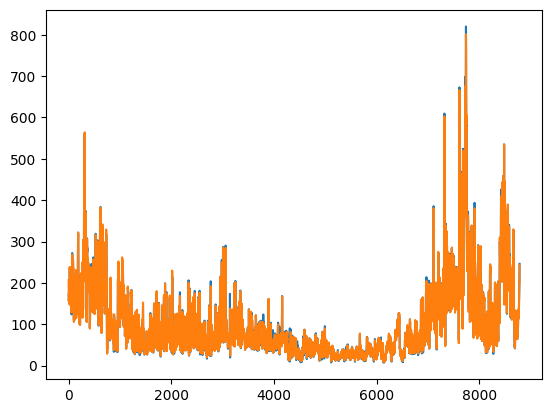

In [20]:
pred_check = model.predict(X)
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9957312403414823


In [22]:
import joblib
joblib.dump(model, 'Delhi_PM2.5_µgm³.pkl')

['Delhi_PM2.5_µgm³.pkl']

In [23]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
pred_check2 = model.predict(X)

In [25]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9886676115301444


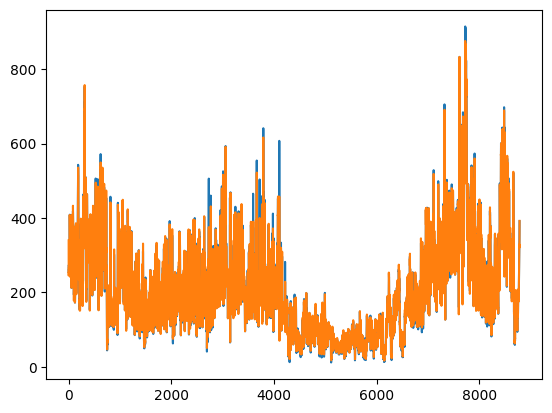

In [26]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [27]:
joblib.dump(model, 'Delhi_PM10_µgm³.pkl')

['Delhi_PM10_µgm³.pkl']